# **Oficina 5**

In [188]:

# criando dataset sintético com numpy
import numpy as np
import pandas as pd

np.random.seed(42)  # Para resultados reproduzíveis
lote = np.random.uniform(1, 300, size=5000)  # Lote da casa
ano = np.random.randint(1, 100, size=5000)  # Ano de construção
area_primeiro_andar = np.random.uniform(1, 100, size=5000)  # Área do primeiro andar
area_segundo_andar = np.random.uniform(1, 50, size=5000)  # Área do segundo andar
banheiros = np.random.randint(1, 5, size=5000)  # Número de banheiros
quartos = np.random.randint(1, 10, size=5000)  # Número de quartos
preco = 10*(np.random.uniform(0, 1000, size=5000) + 1000 + 100*lote + 50*ano + 200*area_primeiro_andar + 300*area_segundo_andar + 500*banheiros + 400*quartos)  # Preço

# Criar DataFrame
df = pd.DataFrame({
    'lote': lote,
    'ano': ano,
    'area_Primeiro_Andar': area_primeiro_andar,
    'area_Segundo_Andar': area_segundo_andar,
    'banheiros': banheiros,
    'quartos': quartos,
    'preco': preco
})

# Visualizar as primeiras 10 linhas do DataFrame
print("Visualizando as primeiras 10 linhas do dataset sintético (Preço de Casas):")
df.head(10)

Visualizando as primeiras 10 linhas do dataset sintético (Preço de Casas):


,lote,ano,area_Primeiro_Andar,area_Segundo_Andar,banheiros,quartos,preco
0,112.987496,51,11.506416,11.278167,3,6,249309.158794
1,285.263578,71,69.175860,10.755723,1,7,542338.769036
2,219.866189,96,97.886754,47.091622,2,3,639524.965514
3,179.998887,48,72.933839,38.315536,2,7,514035.703297
4,47.649573,19,92.944208,35.115299,3,7,405635.523304
5,47.642362,6,80.626167,12.707512,4,4,305453.537422
6,18.367000,84,17.148353,6.810098,1,4,151101.446450
7,259.986668,27,25.671173,43.670798,2,3,494194.000879
8,180.733389,53,34.844695,1.288099,3,7,340028.698913
9,212.713701,48,17.657784,20.016725,1,5,368405.171697


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lote                 5000 non-null   float64
 1   ano                  5000 non-null   int64  
 2   area_Primeiro_Andar  5000 non-null   float64
 3   area_Segundo_Andar   5000 non-null   float64
 4   banheiros            5000 non-null   int64  
 5   quartos              5000 non-null   int64  
 6   preco                5000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 273.6 KB


In [190]:
df.duplicated().sum()

0

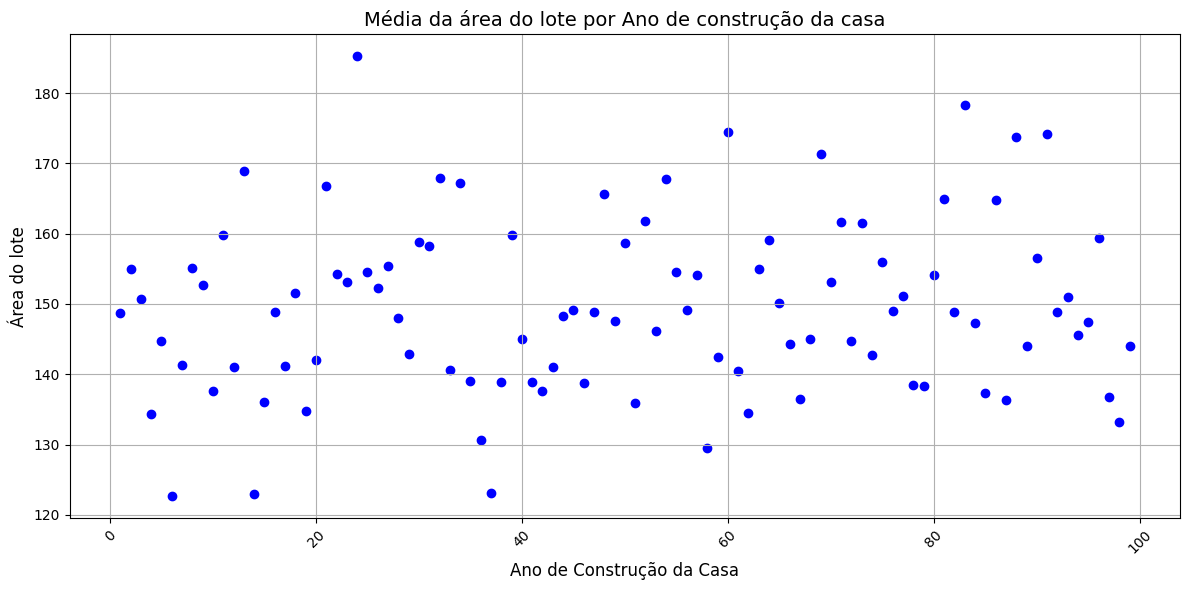

In [191]:
import matplotlib.pyplot as plt

Avg_Area_lote_por_ano = df.groupby('ano')['lote'].mean()
plt.figure(figsize=(12,6))
plt.scatter(Avg_Area_lote_por_ano.index, Avg_Area_lote_por_ano.values, color='b')

plt.title("Média da área do lote por Ano de construção da casa", fontsize=14)
plt.xlabel("Ano de Construção da Casa", fontsize=12)
plt.ylabel("Área do lote", fontsize=12)
plt.grid(True)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

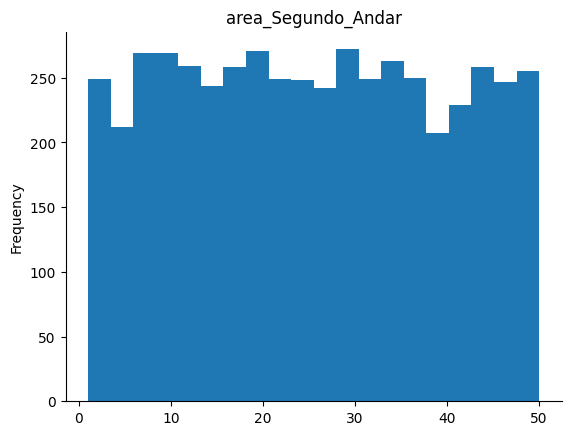

In [192]:
df['area_Segundo_Andar'].plot(kind='hist', bins=20, title='area_Segundo_Andar')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [193]:
X = df.drop('preco', axis=1)
y = df['preco']

In [194]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

Normalização dos dados

In [195]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train)

X_test_std = std.transform(X_test)

Treinamento do modelo de Regressão Linear

In [196]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train_std, y_train)

LinearRegression()

In [197]:
pred = reg.predict(X_test_std)

**O que podemos tirar dos seguintes resultados?**

r2: 99% da variância nos dados de saída (variável dependente) é explicada pelo modelo.

mse e rmse são taxas de erros do modelo, ou seja, o quanto a previsão do modelo se distanciou do valor real, porém o mse vai me mostrar os valores ao quadrado e o rmse é a raiz do mse.

In [198]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

R2: 0.9993281049245074
MSE: 7988020.626461362
RMSE: 2826.3086573234286
